In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from math import sqrt

## Data Collection And Analysis

In [2]:
## Loading data from our csv file to Pandas DataFrame
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Domain analysis

Age      : age of primary beneficiary

Sex      : beneficiary’s gender - female or male

BMI      : Body mass index is a value derived from the mass and height of a person. The BMI is defined as the body mass                divided by the square of the body height, and is expressed in units of kg/m², resulting from mass in kilograms              and height in metres, ideally 18.5 to 24.9

Children : Number of children covered by health insurance / Number of dependents

Smoker   : Smoking or non-smoking

Region   : the beneficiary's residential area in the US; northeast, southeast, southwest, northwest.

Charges  : Individual medical costs billed by health insurance (to be predicted)



In [3]:
## undersatnding number of rows and columns
df.shape

(1338, 7)

In [4]:
## getting some info regarding the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#### Categorical Features:
- sex
- smoker
- region

In [5]:
## checking missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Exploratory Data Analysis

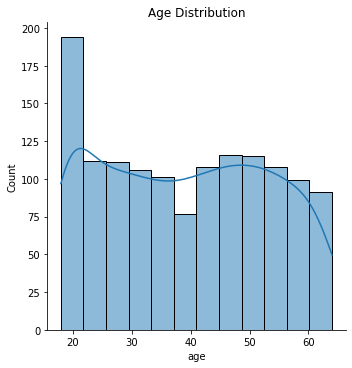

In [7]:
## understanding the distribution of age value
sns.displot(df['age'], kde= True)
plt.title('Age Distribution')
plt.show()

- Most people in our dataset are in the age group of 20s

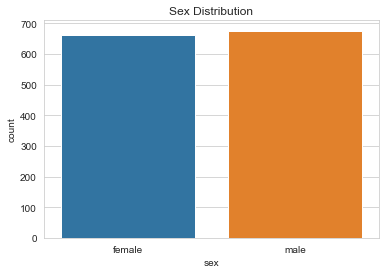

In [8]:
sns.set_style('whitegrid')
sns.countplot(x= 'sex', data= df)
plt.title('Sex Distribution')
plt.show()

- The distribution of male and female are almost same in the given dataset

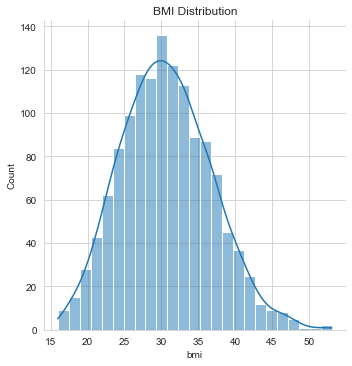

In [9]:
## bmi distribution
sns.displot(df['bmi'], kde= True)
plt.title('BMI Distribution')
plt.show()

- Normal BMI range is 18.5 to 24.9

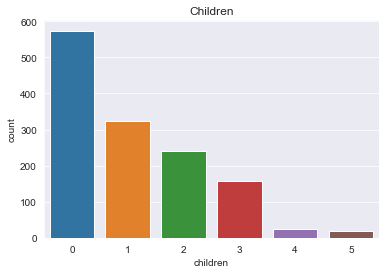

In [10]:
sns.set_style('darkgrid')
sns.countplot(x= 'children', data= df)
plt.title('Children')
plt.show()

- We have more people in our dataset with no children.

In [11]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

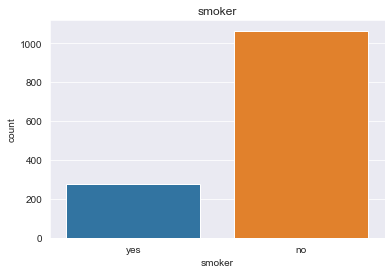

In [12]:
sns.set_style('darkgrid')
sns.countplot(x= 'smoker', data= df)
plt.title('smoker')
plt.show()

- More people in our dataset are non- smokers

In [13]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

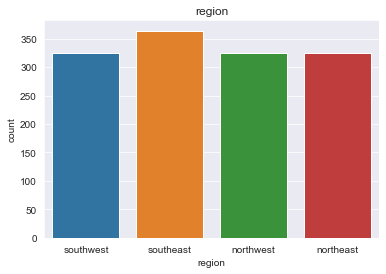

In [14]:
sns.set_style('darkgrid')
sns.countplot(x= 'region', data= df)
plt.title('region')
plt.show()

- More people in our dataset are from southeast 

In [15]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

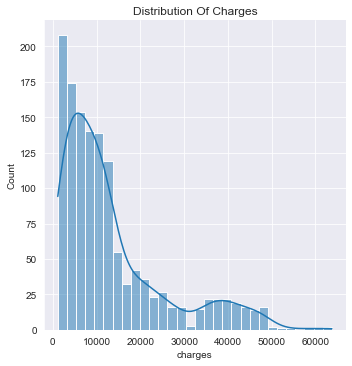

In [16]:
## Distribution of the Charges
sns.displot(df['charges'], kde= True)
plt.title('Distribution Of Charges')
plt.show()

- We have more data accumalated below 10,000$ 

<AxesSubplot:xlabel='bmi', ylabel='charges'>

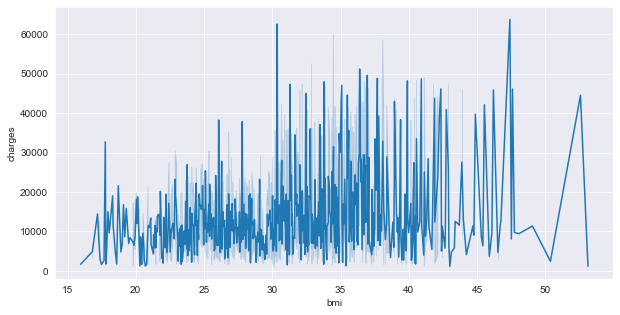

In [17]:
plt.figure(figsize=(10,5))
sns.lineplot(x=df.bmi,y=df.charges)

- Higher the bmi higher the charges

<AxesSubplot:xlabel='bmi', ylabel='charges'>

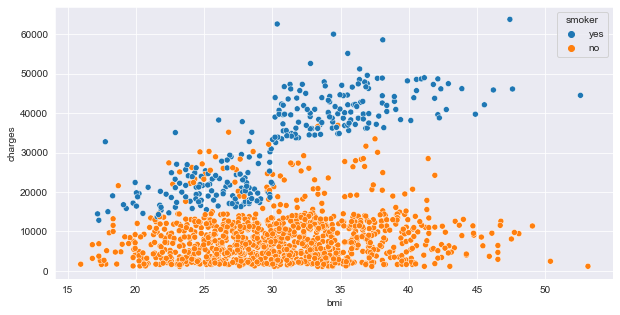

In [18]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df.bmi,y=df.charges,hue=df.smoker)

- The premium charges are increasing if the person has higher bmi & is a smoker 

####  Heatmap Creation

In [19]:
numeric_columns=['age', 'bmi', 'children', 'charges']

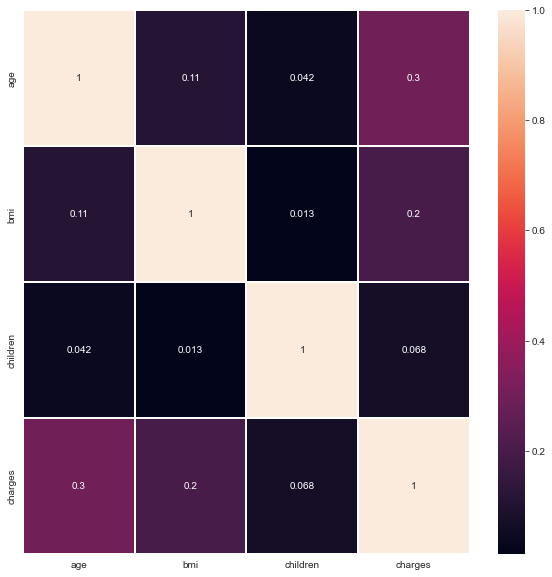

In [20]:
sns.heatmap(df[numeric_columns].corr(),annot= True, linewidths= 0.1)
fig= plt.gcf() 
fig.set_size_inches(10,10)
plt.show()

## Data Pre-Processing

#### Encoding the categorical features

In [21]:
## encoding sex column
df.replace({'sex':{'male':1, 'female': 0 }}, inplace= True)

## encoding smoker column
df.replace({'smoker':{'yes':0, 'no':1}}, inplace= True)

## encoding region column
df.replace({'region':{'southwest':0,'southeast':1,'northwest':2,'northeast':3 }}, inplace= True)

#### Finding outliers in our data

<AxesSubplot:xlabel='age'>

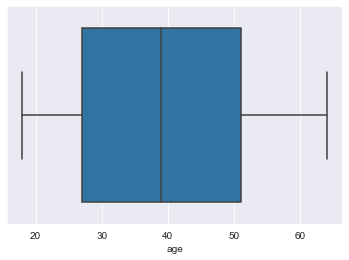

In [22]:
sns.boxplot(x= 'age', data =df)

<AxesSubplot:xlabel='bmi'>

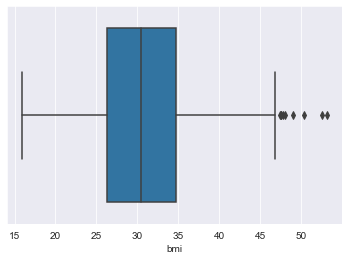

In [23]:
sns.boxplot(x= 'bmi', data =df)

Text(0, 0.5, 'Count')

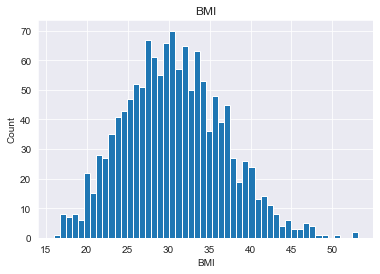

In [24]:
figure=df.bmi.hist(bins=50)
figure.set_title('BMI')
figure.set_xlabel('BMI')
figure.set_ylabel('Count')

In [25]:
##### Assuming Age follows A Gaussian Distribution we will calculate the boundaries which differentiates the outliers

upper_boundary=df['bmi'].mean() + 3* df['bmi'].std()
lower_boundary=df['bmi'].mean() - 3* df['bmi'].std()
print(upper_boundary), print(lower_boundary),print(df['bmi'].mean())

48.95795759602359
12.368836125949485
30.663396860986538


(None, None, None)

In [26]:
df1=df.copy()

In [27]:
df1.loc[df1['bmi']>=48,'bmi']= 48  ##replacing the outliers with upper_boundary 

Text(0, 0.5, 'Count')

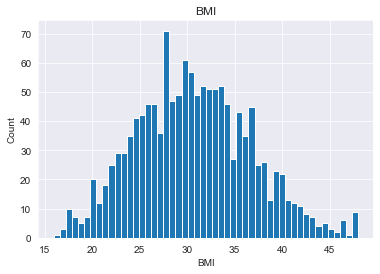

In [28]:
figure=df1.bmi.hist(bins=50)
figure.set_title('BMI')
figure.set_xlabel('BMI')
figure.set_ylabel('Count')

In [29]:
df1['bmi'].describe()

count    1338.000000
mean       30.653516
std         6.066670
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        48.000000
Name: bmi, dtype: float64

## Splitting the Features and Target

In [30]:
x= df1.drop(columns='charges' , axis=1)
y= df1['charges']

In [31]:
x.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,0,0
1,18,1,33.770,1,1,1
2,28,1,33.000,3,1,1
3,33,1,22.705,0,1,2
4,32,1,28.880,0,1,2


In [32]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

### Scaling The Data & Splitting The Data Into Training And Testing Data

In [33]:
from sklearn.preprocessing import StandardScaler
std= StandardScaler().fit(x)
x_std = std.transform(x)

In [34]:
x_std

array([[-1.43876426, -1.0105187 , -0.45404576, -0.90861367, -1.97058663,
        -1.34390459],
       [-1.50996545,  0.98959079,  0.51389784, -0.07876719,  0.5074631 ,
        -0.43849455],
       [-0.79795355,  0.98959079,  0.38692738,  1.58092576,  0.5074631 ,
        -0.43849455],
       ...,
       [-1.50996545, -1.0105187 ,  1.02177965, -0.90861367,  0.5074631 ,
        -0.43849455],
       [-1.29636188, -1.0105187 , -0.80032881, -0.90861367,  0.5074631 ,
        -1.34390459],
       [ 1.55168573, -1.0105187 , -0.26111663, -0.90861367, -1.97058663,
         0.46691549]])

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42, test_size=0.3, shuffle= True)

In [37]:
x_train_std, x_test_std, y_train, y_test = train_test_split(x_std,y,random_state=42, test_size=0.3, shuffle= True)

## Model Training

#### Linear Regression

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
reg= LinearRegression()

In [40]:
reg.fit(x_train,y_train)

LinearRegression()

#### Model Evaluation

In [41]:
from sklearn import metrics
from sklearn.metrics import r2_score,accuracy_score,mean_squared_error, mean_absolute_error

In [42]:
predict_reg = reg.predict(x_test)

In [43]:
## R squared value
r2_linear = r2_score(y_test,predict_reg)*100

In [44]:
print('R squared value is:', r2_linear)

R squared value is: 76.87809841272875


In [45]:
#calculate RMSE
rmse1 = sqrt(mean_squared_error(y_test,predict_reg))
print(rmse1) 

5822.570581306631


In [46]:
##calculate mean absolute error
print((mean_absolute_error(y_test,predict_reg)))

4167.8907166945655


#### Building a predictive system

In [47]:
input_data= (37,1,37.07,1,0,1) ##37,male,37.07,1,yes,southeast,39871.7043 (orginal values)

## changing input data into numpy array
k = np.asarray(input_data)

## reshape the array
z = k.reshape(1,-1)

pred = reg.predict(z)
print(pred)

print("The insurance cost is USD:" , pred)

[33617.99022889]
The insurance cost is USD: [33617.99022889]


C:\Users\Anirudh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Decision Tree Regression

In [48]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(random_state = 42)

In [49]:
dt_reg.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

In [50]:
dt_pred = dt_reg.predict(x_test)

In [51]:
r2_dt = r2_score(y_test,dt_pred)*100

In [52]:
r2_dt

73.63085251507904

In [53]:
#calculate RMSE
rmse2= sqrt(mean_squared_error(y_test,dt_pred))
print(rmse2) 

6218.00450284066


In [54]:
##calculate mean absolute error
print((mean_absolute_error(y_test,dt_pred)))

2865.0532329079606


#### Building a predictive system

In [55]:
input_data= (37,1,37.07,1,0,1) ##37,male,37.07,1,yes,southeast,39871.7043 (orginal values)

## changing input data into numpy array
k = np.asarray(input_data)

## reshape the array
z = k.reshape(1,-1)

pred = dt_reg.predict(z)
print(pred)

print("The insurance cost is USD:" , pred)

[39871.7043]
The insurance cost is USD: [39871.7043]


C:\Users\Anirudh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


### Support Vector Regression

In [56]:
from sklearn.svm import SVR
sv_reg = SVR(kernel = 'rbf')


In [57]:
sv_reg.fit(x_train, y_train)

SVR()

In [58]:
sv_pred= sv_reg.predict(x_test)

In [59]:
r2_sv = r2_score(y_test,sv_pred)*100

In [60]:
r2_sv

-8.171732524856367

##### If the chosen model fits worse than a horizontal line, then R2 is negative.R2 is negative only when the chosen model does not follow the trend of the data, so fits worse than a horizontal line.

In [61]:
#calculate RMSE
rmse3= sqrt(mean_squared_error(y_test,sv_pred))
print(rmse3) 

12593.889556116328


In [62]:
##calculate mean absolute error
print((mean_absolute_error(y_test,sv_pred)))

8229.893370985028


### Random Forest Regression

In [63]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators = 100, random_state = 42)

In [64]:
rf_reg.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [65]:
rf_pred = rf_reg.predict(x_test)

In [66]:
r2_rf = r2_score(y_test,rf_pred)*100

In [67]:
r2_rf

85.29232480853832

In [68]:
#calculate RMSE
rmse4=sqrt(mean_squared_error(y_test,rf_pred))
print(rmse4) 

4643.8159908416665


In [69]:
##calculate mean absolute error
print((mean_absolute_error(y_test,rf_pred)))

2571.222112483334


#### Building A Predictive System

In [70]:
input_data= (37,1,37.07,1,0,1) ##37,male,37.07,1,yes,southeast,39871.7043 (orginal values)

## changing input data into numpy array
k = np.asarray(input_data)

## reshape the array
z = k.reshape(1,-1)

pred = rf_reg.predict(z)
print(pred)

print("The insurance cost is USD:" , pred)

[40128.2942121]
The insurance cost is USD: [40128.2942121]


C:\Users\Anirudh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


#### XGBoost

In [71]:
import xgboost as xg
xgb_r = xg.XGBRegressor()

In [72]:
xgb_r.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [73]:
pred_xgb = xgb_r.predict(x_test)

In [74]:
r2_xgb = r2_score(y_test, pred_xgb)*100

In [75]:
r2_xgb

81.88915026072833

In [76]:
#calculate RMSE
rmse5= sqrt(mean_squared_error(y_test,pred_xgb))
print(rmse5) 

5153.1454553459125


In [77]:
##calculate mean absolute error
print((mean_absolute_error(y_test,pred_xgb)))

2880.2030741624053


#### Building a predictive system

In [78]:
input_data= (37,1,37.07,1,0,1) ##37,male,37.07,1,yes,southeast,39871.7043

## changing input data into numpy array
k = np.asarray(input_data)

## reshape the array
z = k.reshape(1,-1)

pred = xgb_r.predict(z)
print(pred)

print("The insurance cost is USD:" , pred)

[40197.76]
The insurance cost is USD: [40197.76]


### CatBoost

In [79]:
from catboost import CatBoostRegressor
cat_reg = CatBoostRegressor()

In [80]:
cat_reg.fit(x_train, y_train)

Learning rate set to 0.040517
0:	learn: 11777.3162658	total: 145ms	remaining: 2m 25s
1:	learn: 11437.5588501	total: 148ms	remaining: 1m 13s
2:	learn: 11113.3281037	total: 149ms	remaining: 49.6s
3:	learn: 10809.0513257	total: 154ms	remaining: 38.3s
4:	learn: 10492.2910630	total: 157ms	remaining: 31.2s
5:	learn: 10193.9556890	total: 159ms	remaining: 26.4s
6:	learn: 9924.4247236	total: 162ms	remaining: 22.9s
7:	learn: 9663.1297942	total: 164ms	remaining: 20.3s
8:	learn: 9406.9784182	total: 166ms	remaining: 18.3s
9:	learn: 9173.3373065	total: 169ms	remaining: 16.7s
10:	learn: 8964.4392608	total: 170ms	remaining: 15.3s
11:	learn: 8739.0518908	total: 173ms	remaining: 14.2s
12:	learn: 8537.9656713	total: 175ms	remaining: 13.3s
13:	learn: 8338.1534717	total: 178ms	remaining: 12.5s
14:	learn: 8138.5027080	total: 180ms	remaining: 11.8s
15:	learn: 7940.3995664	total: 182ms	remaining: 11.2s
16:	learn: 7755.3081348	total: 184ms	remaining: 10.7s
17:	learn: 7621.2264896	total: 185ms	remaining: 10.1s


200:	learn: 3875.1707624	total: 663ms	remaining: 2.64s
201:	learn: 3870.0450671	total: 666ms	remaining: 2.63s
202:	learn: 3864.0551213	total: 669ms	remaining: 2.63s
203:	learn: 3862.2187817	total: 671ms	remaining: 2.62s
204:	learn: 3860.0951600	total: 674ms	remaining: 2.61s
205:	learn: 3857.4429501	total: 676ms	remaining: 2.61s
206:	learn: 3855.8944861	total: 678ms	remaining: 2.6s
207:	learn: 3852.4434921	total: 681ms	remaining: 2.59s
208:	learn: 3850.9987467	total: 684ms	remaining: 2.59s
209:	learn: 3845.9564971	total: 687ms	remaining: 2.58s
210:	learn: 3844.7047572	total: 689ms	remaining: 2.58s
211:	learn: 3843.2912214	total: 691ms	remaining: 2.57s
212:	learn: 3839.1751738	total: 695ms	remaining: 2.57s
213:	learn: 3837.6289753	total: 697ms	remaining: 2.56s
214:	learn: 3835.1019337	total: 700ms	remaining: 2.56s
215:	learn: 3833.8360580	total: 702ms	remaining: 2.55s
216:	learn: 3830.6959464	total: 704ms	remaining: 2.54s
217:	learn: 3829.6118904	total: 707ms	remaining: 2.54s
218:	learn:

388:	learn: 3481.6110980	total: 1.16s	remaining: 1.82s
389:	learn: 3479.7982295	total: 1.16s	remaining: 1.82s
390:	learn: 3474.4249416	total: 1.16s	remaining: 1.81s
391:	learn: 3470.0958459	total: 1.17s	remaining: 1.81s
392:	learn: 3468.5014888	total: 1.17s	remaining: 1.81s
393:	learn: 3468.0314644	total: 1.17s	remaining: 1.8s
394:	learn: 3464.6020664	total: 1.17s	remaining: 1.8s
395:	learn: 3462.6159410	total: 1.18s	remaining: 1.79s
396:	learn: 3462.1959417	total: 1.18s	remaining: 1.79s
397:	learn: 3459.7628897	total: 1.18s	remaining: 1.78s
398:	learn: 3458.6066184	total: 1.18s	remaining: 1.78s
399:	learn: 3457.2215036	total: 1.19s	remaining: 1.78s
400:	learn: 3452.0792138	total: 1.19s	remaining: 1.77s
401:	learn: 3450.7830947	total: 1.19s	remaining: 1.77s
402:	learn: 3450.3132895	total: 1.19s	remaining: 1.77s
403:	learn: 3447.2613431	total: 1.2s	remaining: 1.76s
404:	learn: 3446.5093514	total: 1.2s	remaining: 1.76s
405:	learn: 3444.3755098	total: 1.2s	remaining: 1.76s
406:	learn: 344

567:	learn: 3168.3242793	total: 1.65s	remaining: 1.25s
568:	learn: 3167.3055348	total: 1.65s	remaining: 1.25s
569:	learn: 3165.9984649	total: 1.65s	remaining: 1.25s
570:	learn: 3164.2627387	total: 1.66s	remaining: 1.24s
571:	learn: 3163.4035218	total: 1.66s	remaining: 1.24s
572:	learn: 3162.3884916	total: 1.66s	remaining: 1.24s
573:	learn: 3161.1983494	total: 1.66s	remaining: 1.23s
574:	learn: 3158.2699542	total: 1.67s	remaining: 1.23s
575:	learn: 3156.1298669	total: 1.67s	remaining: 1.23s
576:	learn: 3153.2767256	total: 1.67s	remaining: 1.22s
577:	learn: 3152.2749611	total: 1.67s	remaining: 1.22s
578:	learn: 3149.7438391	total: 1.67s	remaining: 1.22s
579:	learn: 3146.8960730	total: 1.68s	remaining: 1.21s
580:	learn: 3146.7616186	total: 1.68s	remaining: 1.21s
581:	learn: 3146.0241300	total: 1.68s	remaining: 1.21s
582:	learn: 3145.0331696	total: 1.68s	remaining: 1.2s
583:	learn: 3144.8724510	total: 1.68s	remaining: 1.2s
584:	learn: 3143.2365942	total: 1.69s	remaining: 1.2s
585:	learn: 3

773:	learn: 2887.9483048	total: 2.13s	remaining: 621ms
774:	learn: 2887.3619820	total: 2.13s	remaining: 618ms
775:	learn: 2885.5647976	total: 2.13s	remaining: 616ms
776:	learn: 2883.9804825	total: 2.13s	remaining: 613ms
777:	learn: 2883.6439990	total: 2.14s	remaining: 610ms
778:	learn: 2883.5530836	total: 2.14s	remaining: 607ms
779:	learn: 2883.2030537	total: 2.14s	remaining: 604ms
780:	learn: 2882.5399804	total: 2.14s	remaining: 601ms
781:	learn: 2881.6486260	total: 2.15s	remaining: 598ms
782:	learn: 2880.2132746	total: 2.15s	remaining: 595ms
783:	learn: 2878.9137995	total: 2.15s	remaining: 592ms
784:	learn: 2876.4524128	total: 2.15s	remaining: 590ms
785:	learn: 2875.4594623	total: 2.15s	remaining: 587ms
786:	learn: 2874.6694859	total: 2.16s	remaining: 584ms
787:	learn: 2872.4887780	total: 2.16s	remaining: 581ms
788:	learn: 2871.6997066	total: 2.16s	remaining: 578ms
789:	learn: 2870.9783282	total: 2.16s	remaining: 575ms
790:	learn: 2868.9293296	total: 2.17s	remaining: 572ms
791:	learn

982:	learn: 2625.2367970	total: 2.62s	remaining: 45.3ms
983:	learn: 2622.5947170	total: 2.62s	remaining: 42.7ms
984:	learn: 2620.7360200	total: 2.63s	remaining: 40.1ms
985:	learn: 2618.9319289	total: 2.63s	remaining: 37.4ms
986:	learn: 2617.7926334	total: 2.63s	remaining: 34.7ms
987:	learn: 2616.8804816	total: 2.64s	remaining: 32ms
988:	learn: 2615.5301186	total: 2.64s	remaining: 29.4ms
989:	learn: 2614.1419900	total: 2.64s	remaining: 26.7ms
990:	learn: 2612.4823807	total: 2.65s	remaining: 24ms
991:	learn: 2612.2480547	total: 2.65s	remaining: 21.4ms
992:	learn: 2611.0430415	total: 2.65s	remaining: 18.7ms
993:	learn: 2610.3729205	total: 2.66s	remaining: 16ms
994:	learn: 2606.8508640	total: 2.66s	remaining: 13.4ms
995:	learn: 2606.6327071	total: 2.66s	remaining: 10.7ms
996:	learn: 2605.6818371	total: 2.67s	remaining: 8.02ms
997:	learn: 2605.4373715	total: 2.67s	remaining: 5.34ms
998:	learn: 2603.1423706	total: 2.67s	remaining: 2.67ms
999:	learn: 2602.2304988	total: 2.67s	remaining: 0us


In [81]:
pred_cat = cat_reg.predict(x_test)

In [82]:
r2_cat = metrics.r2_score(y_test, pred_cat)*100

In [83]:
r2_cat

85.69828504968638

In [84]:
#calculate RMSE
rmse6= sqrt(mean_squared_error(y_test,pred_cat))
print(rmse6) 

4579.278388882698


In [85]:
##calculate mean absolute error
print((mean_absolute_error(y_test,pred_cat)))

2524.818062984316


In [86]:
input_data= (37,1,37.07,1,0,1) ##37,male,37.07,1,yes,southeast,39871.7043

## changing input data into numpy array
k = np.asarray(input_data)

## reshape the array
z = k.reshape(1,-1)

pred = cat_reg.predict(z)
print(pred)

print("The insurance cost is USD:" , pred)

[41386.57880793]
The insurance cost is USD: [41386.57880793]


In [87]:
algorithms=['Lin-Reg', 'DT', 'SVR', 'RF', 'XGB', 'CB']
R2_scores=[r2_linear, r2_dt,r2_sv,r2_rf,r2_xgb , r2_cat]

<AxesSubplot:>

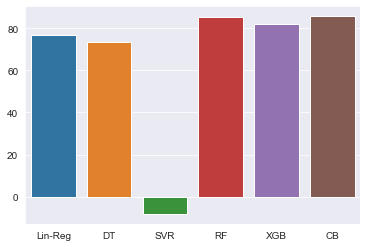

In [88]:
sns.barplot(x=algorithms, y=R2_scores)

- The best R2 score is given by Catboost

In [89]:
algorithms=['Lin-Reg', 'DT', 'SVR', 'RF', 'XGB', 'CB']
RMSE=[rmse1,rmse2,rmse3,rmse4,rmse5,rmse6]

<AxesSubplot:>

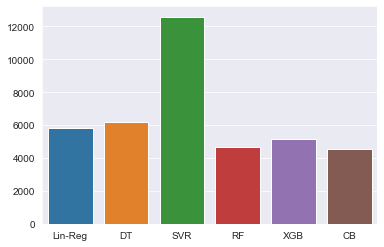

In [90]:
sns.barplot(x=algorithms,y= RMSE)

- The lower the RMSE, the better a given model is able to “fit” a dataset.
- And the lowest is given by Catboost

## Conclusion

#### Catboost algorithm performs better compared to other algorithms